In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

import yfinance as yf

In [2]:
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [3]:
ticker='PG'
data= pd.DataFrame()
data[ticker]= wb.get_data_yahoo(ticker, start='2007-1-1', end='2024-7-20')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [4]:
log_returns= np.log(1 + data.pct_change())

In [5]:
r= 0.024

In [6]:
stdev= log_returns.std() * 250 ** 0.5

In [7]:
type(stdev)

pandas.core.series.Series

In [8]:
stdev= stdev.values
stdev

array([0.18390743])

Setando intervalo

In [9]:
T= 1.0
t_intervals= 250
delta_t = T / t_intervals

iterations= 10000

In [10]:
Z= np.random.standard_normal((t_intervals + 1, iterations))
S= np.zeros_like(Z)
S0= data.iloc[-1]
S[0]=S0

In [15]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [16]:
S

array([[167.96000671, 167.96000671, 167.96000671, ..., 167.96000671,
        167.96000671, 167.96000671],
       [169.09685492, 165.13697745, 167.63629052, ..., 166.70972152,
        171.01424484, 169.27768018],
       [167.61679667, 165.7653609 , 171.23185043, ..., 168.46746436,
        171.45619322, 165.74361943],
       ...,
       [180.34641607, 148.25387954, 271.53820449, ..., 160.32822954,
        157.11693161, 190.64930706],
       [177.11956873, 149.16049692, 273.02173409, ..., 159.33245716,
        157.10972755, 193.39727343],
       [176.09542808, 149.10980516, 277.70550969, ..., 160.04552844,
        159.40367254, 195.75606003]])

In [17]:
S.shape

(251, 10000)

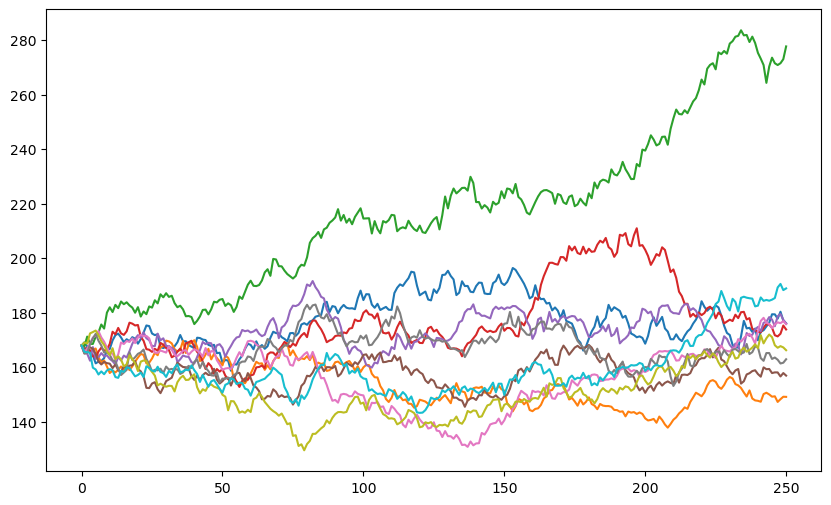

In [18]:
plt.figure(figsize=(10,6))
plt.plot(S[:,:10])

Opção de Compra:

Compra se: S-K > 0

Não compra se: S-K < 0

np.maxium():

Irá criar uma array que contém 0s ou os números iguais as diferenças


In [19]:
p = np.maximum(S[-1] - 110, 0)

In [24]:
p

array([ 66.09542808,  39.10980516, 167.70550969, ...,  50.04552844,
        49.40367254,  85.75606003])

In [21]:
p.shape

(10000,)

C= e(-rT . sum Pi) / iterations

C tem um valor similar ao Black Shole Merton

In [25]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

60.8245341061648